In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Instructions
The end result of this exercise should be a file named prepare.py.

## Store Items
Using your store items data:
1. Convert date column to datetime format.
2. Plot the distribution of sale_amount and item_price.
3. Set the index to be the datetime variable.
4. Add a 'month' and 'day of week' column to your dataframe.
5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
# using store items data
df = pd.read_csv('gulde_all.csv', index_col=0)
df.to_csv()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_id        913000 non-null  int64  
 1   sale_date      913000 non-null  object 
 2   sale_amount    913000 non-null  float64
 3   item_id        913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_id       913000 non-null  int64  
 10  store_state    913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  store_address  913000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [3]:
# convert date column to datetime format
df['sale_date'] = df['sale_date'].astype('datetime64')
df.sale_date.dtype

dtype('<M8[ns]')

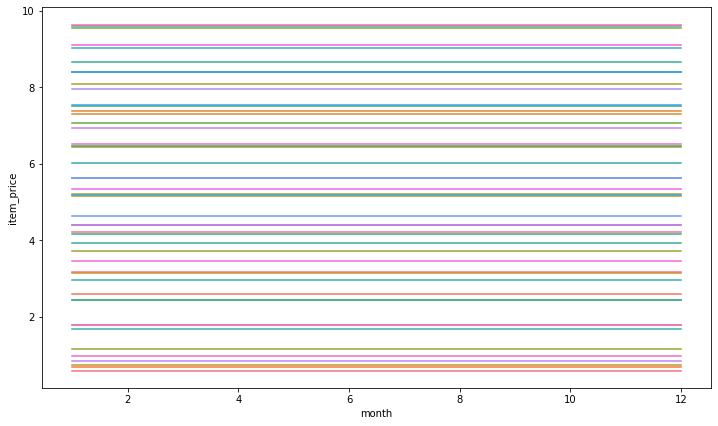

In [4]:
# plot the distribution of sale_date and item_price
plt.figure(figsize=(12,7))
df['month'] = df['sale_date'].dt.month
df_monthly = df.groupby(['month','item_name']).item_price.mean().reset_index()
sns.lineplot(x=df_monthly.month, y=df_monthly.item_price, hue=df_monthly.item_name, legend=None)
plt.show() # item prices don't change over time, don't need to show each item's price here

In [5]:
# set index as sale_date
df.index = df.sale_date

In [6]:
# add a month column
# done earlier
# add a day-of-week column
df['day_name'] = df.index.day_name

In [7]:
# add a sales_total column
df['sales_total'] = df['sale_amount'] * df['item_price']

In [8]:
df.head(2)

,sale_id,sale_date,sale_amount,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_id,store_state,store_city,store_zipcode,store_address,month,day_name,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01,1,2013-01-01,13.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy,1,<bound method inherit_from_data.<locals>.metho...,10.92
2013-01-02,2,2013-01-02,11.0,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,TX,San Antonio,78253,12125 Alamo Ranch Pkwy,1,<bound method inherit_from_data.<locals>.metho...,9.24


In [9]:
# put these to functions, add functions to prepare.py
# done

## OPS Data
Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:
1. Convert date column to datetime format.
2. Plot the distribution of each of your variables.
3. Set the index to be the datetime variable.
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [10]:
# using the ops data
ops = pd.read_csv('opsd_germany_daily.csv', index_col=0)
ops.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


In [11]:
# convert date column to datetime
ops['Date'] = ops['Date'].astype('datetime64')

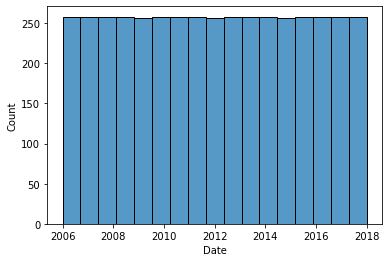

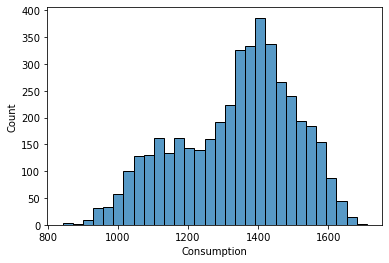

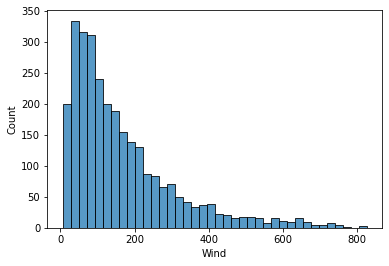

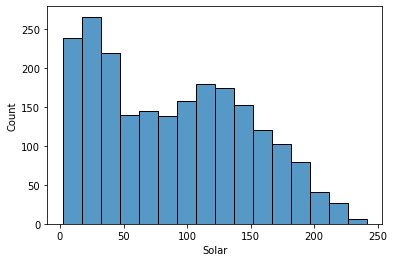

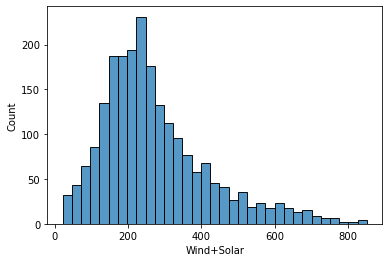

In [12]:
# plot distribution of each variable
for col in ops.columns:
    sns.histplot(ops[col])
    plt.show()

In [13]:
# set index to date
ops.index = ops.Date

In [14]:
# add month and year columns
ops['month'] = ops.index.month
ops['year'] = ops.index.year

In [15]:
# fill missing values
# locate nulls
ops.isna().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [16]:
# fill nulls
values = {"Wind": ops.Wind.mean(), 
          "Solar": ops.Solar.mean(), 
          "Wind+Solar": ops['Wind+Solar'].mean()}
ops = ops.fillna(value=values)
ops.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,,
2006-01-01,2006-01-01,1069.184,164.814173,89.258695,272.663481,1,2006
2006-01-02,2006-01-02,1380.521,164.814173,89.258695,272.663481,1,2006


In [17]:
# add functions to prepare.py
# done